In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("bottle.csv")

/var/folders/qh/gnpmd7351d5gqyf2_d3qqgv40000gn/T/ipykernel_53446/1660720635.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("bottle.csv")


In [4]:
data.shape

(864863, 74)

In [5]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
num_data = data.loc[:,'Depthm':'O2Satq']

In [7]:
df2 = data.loc[:,'R_PRES']
df2.head()

0     0
1     8
2    10
3    19
4    20
Name: R_PRES, dtype: int64

In [8]:
num_data['R_PRES'] = df2

In [9]:
num_data.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,R_PRES
0,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,0
1,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,8
2,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,10
3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,19
4,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,20


In [10]:
num_data.drop(['Oxy_µmol/Kg', 'BtlNum', 'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'O2Satq',  'P_qual','O_qual','SThtaq','O2Sat'], axis= 1, inplace= True)

In [11]:
num_data

,Depthm,T_degC,Salnty,O2ml_L,STheta,R_PRES
0,0,10.500,33.4400,NaN,25.64900,0
1,8,10.460,33.4400,NaN,25.65600,8
2,10,10.460,33.4370,NaN,25.65400,10
3,19,10.450,33.4200,NaN,25.64300,19
4,20,10.450,33.4210,NaN,25.64300,20
...,...,...,...,...,...,...
864858,0,18.744,33.4083,5.805,23.87055,0
864859,2,18.744,33.4083,5.805,23.87072,2
864860,5,18.692,33.4150,5.796,23.88911,5
864861,10,18.161,33.4062,5.816,24.01426,10


In [12]:
num_data.isnull().sum()

Depthm         0
T_degC     10963
Salnty     47354
O2ml_L    168662
STheta     52689
R_PRES         0
dtype: int64

/Users/ribhavsikka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ribhavsikka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fillna with mean')

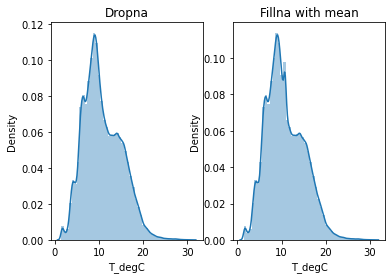

In [13]:
fig, ax=plt.subplots(1,2)
sns.distplot(num_data.T_degC.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(num_data.T_degC.fillna(num_data.T_degC.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

Text(0.5, 1.0, 'Fillna with mean')

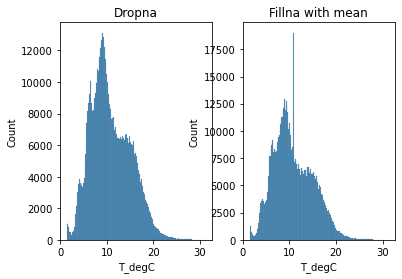

In [14]:
fig, ax=plt.subplots(1,2)
sns.histplot(num_data.T_degC.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.histplot(num_data.T_degC.fillna(num_data.T_degC.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

Text(0.5, 1.0, 'Fillna with mean')

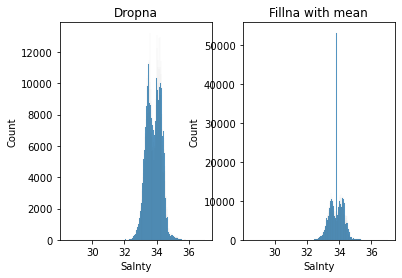

In [15]:
fig, ax=plt.subplots(1,2)
sns.histplot(num_data.Salnty.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.histplot(num_data.Salnty.fillna(num_data.Salnty.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

In [16]:
#decide to drop missing values for the temperature variable, to avoid spike by plugging in mean
num_data = num_data[num_data['T_degC'].notna()]
#decide to drop missing values from salinity variable, as it's dependent we don't care abt missing values
num_data = num_data[num_data['Salnty'].notna()]


In [15]:
num_data.isnull().sum()

Depthm         0
T_degC         0
Salnty         0
O2ml_L    152758
STheta      2073
R_PRES         0
dtype: int64

/Users/ribhavsikka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ribhavsikka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fillna with mean')

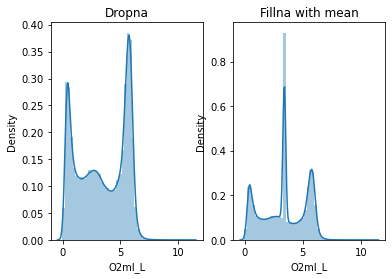

In [18]:
fig, ax=plt.subplots(1,2)
sns.distplot(num_data.O2ml_L.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(num_data.O2ml_L.fillna(num_data.O2ml_L.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

Text(0.5, 1.0, 'Fillna with mean')

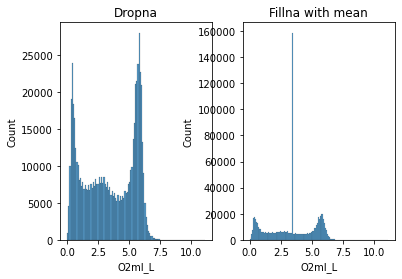

In [17]:
fig, ax=plt.subplots(1,2)
sns.histplot(num_data.O2ml_L.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.histplot(num_data.O2ml_L.fillna(num_data.O2ml_L.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

In [18]:
#decide to drop to avoid spike for O2ml_L variable
num_data = num_data[num_data['O2ml_L'].notna()]

/Users/ribhavsikka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ribhavsikka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fillna with mean')

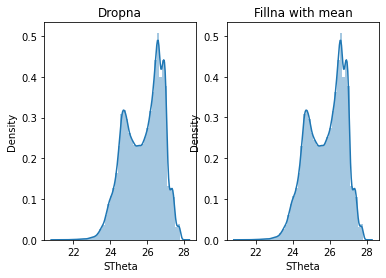

In [19]:
fig, ax=plt.subplots(1,2)
sns.distplot(num_data.STheta.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(num_data.STheta.fillna(num_data.STheta.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

Text(0.5, 1.0, 'Fillna with mean')

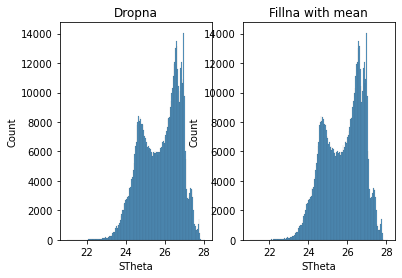

In [20]:
fig, ax=plt.subplots(1,2)
sns.histplot(num_data.STheta.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.histplot(num_data.STheta.fillna(num_data.STheta.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

In [21]:
#decide to fill in with mean as there is no spike to avoid
num_data['STheta'] = num_data['STheta'].fillna(num_data['STheta'].mean())

In [22]:
num_data.isnull().sum()

Depthm    0
T_degC    0
Salnty    0
O2ml_L    0
STheta    0
R_PRES    0
dtype: int64

In [36]:
split = (np.random.rand(len(num_data)) <= 0.75)
training = num_data[split]
testing = num_data[~split]

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 496286
No. of testing examples: 165203


In [37]:
training.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,R_PRES
2160,0,10.30,33.030,5.90,25.364,0
2161,6,18.46,32.920,6.02,23.568,6
2163,15,10.29,32.990,6.06,25.335,15
2164,20,10.33,33.005,6.04,25.339,20
2166,31,10.40,33.060,6.01,25.371,31


In [38]:
testing.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,R_PRES
2162,10,10.29,32.951,6.04,25.304,10
2165,30,10.39,33.054,6.01,25.368,30
2168,50,10.35,33.167,5.76,25.463,50
2171,98,9.54,33.640,3.82,25.969,99
2176,197,8.04,33.960,1.78,26.454,198
